# Find drivers for customer churn at Telco. Why are customers churning?


pick which one is the most important 
give a good conclusion 

# Sample questions



>Are customers with DSL more or less likely to churn?

>What month are customers most likely to churn and does that depend 
on their contract type?

>Is there a service that is associated with more churn than expected?

>Do customers who churn have a higher average monthly spend than those who don't?


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



#modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


#evaulation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import acquire as a
import prepare as p 


this file exists, reading csv
this file exists, reading csv
this file exists, reading csv


In [2]:
df = a.get_telco_data()

In [3]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.notnull().value_counts().sum()

7043

In [5]:
df = p.prep_telco(df)

In [6]:
df.dtypes

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [7]:
len(df)

7043

In [11]:
train.describe()

,senior_citizen,tenure,monthly_charges
count,4225.000000,4225.000000,4225.000000
mean,0.164260,32.650178,65.138947
std,0.370556,24.647481,30.336884
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.550000
75%,0.000000,56.000000,90.400000
max,1.000000,72.000000,118.750000


In [10]:
train, val, test = p.splitting_data(df, 'churn')

In [ ]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [ ]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print(df[col].value_counts().sort_index().plot.bar())
    plt.show()
    print()

In [13]:
train.loc[:, 'is_female'] = train['gender'].replace({'Female': 1, 'Male': 0})

In [14]:
train.loc[:, 'has_partner'] = train['partner'].map({'Yes': 1, 'No': 0})

In [15]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_female,has_partner
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),1,1
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,1,0
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check,0,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,86.05,834.1,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,0,0


In [ ]:
cat_cols

In [20]:
train.dtypes

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
is_female                  int64
has_partner                int64
dtype: object

In [18]:
train.loc[:,'churn'] = train['churn'].replace({'No': 0,'Yes': 1})

In [17]:
train.loc[:,'internet_service_type'] = train['internet_service_type'].replace({'Fiber optic': 1,'DSL': 2, 'None':0})

In [19]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_female,has_partner
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,Yes,No,95.00,3591.25,0,One year,1,Credit card (automatic),1,1
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,1,Month-to-month,1,Electronic check,1,0
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,1,Month-to-month,0,Mailed check,0,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,86.05,834.1,1,Month-to-month,1,Bank transfer (automatic),0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,Yes,Yes,60.00,2548.55,0,Two year,2,Electronic check,0,0


## Are customers with DSL more or less likely to churn?


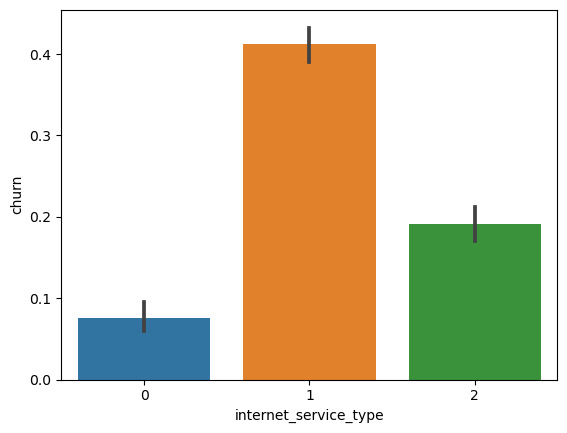

In [21]:
sns.barplot(data=train, y='churn', x='internet_service_type');

## does having fiber optic make a diffent comare to not having it 

a = .05

h0: there is no relationship between churn and internet service type

ha: there is a relationship between churn and internet service  

In [ ]:
observed = pd.crosstab(train.churn,train.internet_service_type)
observed

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
p

In [ ]:
train.

My p-value is less than alpha, therefore, we reject the null hypothesis.

we can conclude that there is a relationship between pclass and survived.

## What month are customers most likely to churn and does that depend on their contract type?


<Axes: xlabel='tenure', ylabel='churn'>

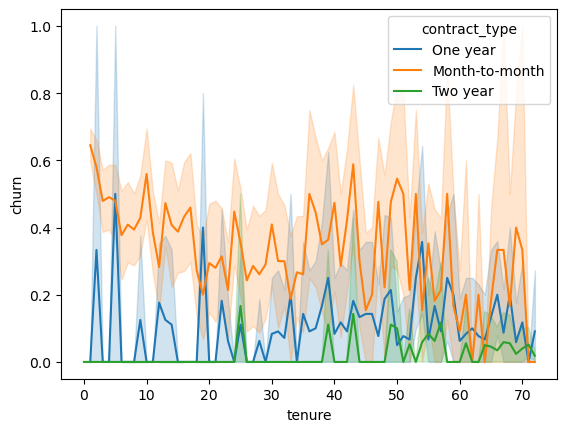

In [22]:
sns.lineplot(data=train,y='churn', x='tenure',hue='contract_type')

In [23]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_female,has_partner
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,Yes,No,95.00,3591.25,0,One year,1,Credit card (automatic),1,1
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,1,Month-to-month,1,Electronic check,1,0
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,1,Month-to-month,0,Mailed check,0,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,86.05,834.1,1,Month-to-month,1,Bank transfer (automatic),0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,Yes,Yes,60.00,2548.55,0,Two year,2,Electronic check,0,0


In [ ]:
# train['service_type'] = pd.concat([train['phone_service'], train['internet_service_type']], axis=1).agg(''.join, axis=1)


## Is there a service that is associated with more churn than expected?


<Axes: xlabel='churn', ylabel='internet_service_type'>

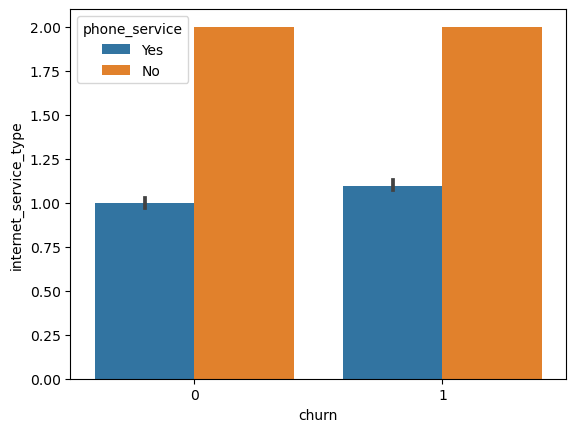

In [24]:
sns.barplot(data=train, x='churn',y='internet_service_type',hue='phone_service')

In [ ]:
df.notnull().

In [ ]:
train

## Do customers who churn have a higher average monthly spend than those who don't?


In [ ]:
sns.barplot(data=train, x='churn',y='monthly_charges',)

mean=train.monthly_charges.mean()
plt.axhline(y=mean, color='red')


from the dataset we can see the higher the monthly bill is the more like they are the churn compare the those who monthly bill are lower

In [ ]:
 train_encoded, val_encoded, test_encoded = p.preprocess_telco(train, val, test)

In [ ]:
train_encoded.columns

In [ ]:
train_encoded = train_encoded.drop(columns='customer_id')

In [ ]:
df.churn.mode()

In [ ]:
(df.churn == 0).mean()

In [ ]:
train_encoded.shape

In [ ]:
train_encoded.head()

In [ ]:
x_train = train_encoded
x_val = val_encoded
x_test = test_encoded

In [ ]:
y_train = train_encoded.churn_Yes
y_val = val_encoded.churn_Yes
y_test = test_encoded.churn_Yes

## model 1 

In [ ]:
tree = DecisionTreeClassifier()
tree

In [ ]:
tree.fit(x_train,y_train)

In [ ]:
fig = plt.figure(figsize=(20,20))
tree.plt

In [ ]:
y_pred = tree.predict(x_train)
y_pred[:10]

In [ ]:
tree.score(x_train,y_pred)

In [ ]:
confusion_matrix(y_train,y_pred)

In [ ]:
print(classification_report(y_train,y_pred))

In [ ]:
x_train

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

In [ ]:
knn.predict(x_train)


In [ ]:
x_train.shape

In [ ]:
x_train.head()

In [ ]:
x_train.columns

In [ ]:
features = ['churn_Yes','internet_service_type_None','internet_service_type_Fiber optic','phone_service_Yes']
x_train[features].head() 

## model 2 

In [ ]:
lr1 = LogisticRegression()
lr1.fit(x_train[features], y_train)

In [ ]:
lr1.score(x_train[features],y_train)
